---

**Andy Edinger**   
**Date:** October 10, 2024  
**Email:** [aedinge@iu.edu](mailto:aedinge@iu.edu)

---
This notebook contains the analysis for: "Cognitive distortions in political polarization" by Andy Edinger, Johan Bollena, Hernán A. Makse, and Matteo Serafino.
---



In [13]:
import pandas as pd
import json
import __CDS__
import matplotlib.pyplot as plt
import scipy.stats as stats 
import numpy as np

data_fldr = "intermediate_data/"


## Initial CDS analysis:

Generate CDS counts from raw Tweet text data, as used in analyses throughout the paper. Raw Tweet data is not included in the git repository, but available upon request from the offers for this initial processing requires 

In [3]:
tweets_2020 = pd.read_csv(data_fldr + "2020_categories_db.csv", index_col = "Unnamed: 0", lineterminator='\n')
tweets_2016 = pd.read_csv(data_fldr + "2016_categories_db.csv", index_col = "Unnamed: 0", lineterminator='\n')


with open(data_fldr + "users_2016_activity.txt") as f:
    users_2016 = json.load(f)
    
with open(data_fldr + "users_2020_activity.txt") as f:
    users_2020 = json.load(f)
    
users_2016 = {int(key):val for key,val in users_2016.items()}
users_2020 = {int(key):val for key,val in users_2020.items()}

# Get users who meet inclusion criteria: >10 tweets in both 2016 and 2020 data sets
long_users = [user for user in set(users_2016.keys()).intersection(set(users_2020.keys())) if users_2016[user]>10 and users_2020[user]>10]

tweets_long_2016 = tweets_2016[tweets_2016['user_id'].isin(long_users)]
tweets_long_2020 = tweets_2020[tweets_2020['user_id'].isin(long_users)]

In [12]:
# Count CDS occurrences in 2016 dataset for included users
CDS_phrases_16, CDS_categories_16, CDS_per_tweet_16 = __CDS__.process_dataset(tweets_long_2016, output="all_variants")
CDS_16 = CDS_per_tweet_16.join(CDS_categories_16).join(CDS_phrases_16)

# Count CDS occurrences in 2020 dataset for included users
CDS_phrases_20, CDS_categories_20, CDS_per_tweet_20 = __CDS__.process_dataset(tweets_long_2020, output="all_variants")
CDS_20 = CDS_per_tweet_20.join(CDS_categories_20).join(CDS_phrases_20)

/nfs/nfs2/home/aedinge/distortion_polarization/__CDS__.py:71: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  output = pd.Series(index=CDS.index)


In [22]:
# Match the CDS counts from each tweet to the unique tweet and user IDs
CDS_20['user_id'] = tweets_long_2020['user_id']
CDS_16['user_id'] = tweets_long_2016['user_id']

CDS_20['tweet_id'] = tweets_long_2020['tweet_id']
CDS_16['tweet_id'] = tweets_long_2016['tweet_id']

# Save CDS counts
CDS_16.to_csv(data_fldr + "231109_all_variants_2016.csv")
CDS_20.to_csv(data_fldr + "231109_all_variants_2020.csv")

In [ ]:

tweets_2020 = pd.read_csv(data_fldr + "2020_categories_db.csv", index_col = "Unnamed: 0", lineterminator='\n')
tweets_2016 = pd.read_csv(data_fldr + "2016_categories_db.csv", index_col = "Unnamed: 0", lineterminator='\n')

with open(data_fldr + "users_2016_activity.txt") as f:
    users_2016 = json.load(f)
    
with open(data_fldr + "users_2020_activity.txt") as f:
    users_2020 = json.load(f)
    
users_2016 = {int(key):val for key,val in users_2016.items()}
users_2020 = {int(key):val for key,val in users_2020.items()}

In [ ]:
user_cts = pd.DataFrame(tweets_2016.groupby('user_id').count().loc[long_users]['distortion']).rename({'distortion':'2016_distortion'}, axis='columns')

user_cts['2016_total'] = pd.Series(users_2016)
user_cts['2020_distortion'] = tweets_2020.groupby('user_id').count().loc[long_users]['distortion']
user_cts['2020_total'] = pd.Series(users_2020)
user_cts['2016_prevalence'] = user_cts['2016_distortion']/user_cts['2016_total']
user_cts['2020_prevalence'] = user_cts['2020_distortion']/user_cts['2020_total']


In [ ]:
user_cts.to_csv(data_fldr + "/user_cds.csv")

### Get example tweets of different CDS types - used to produce Table 1

In [1]:
# read in CDS count data

CDS_16 = pd.read_csv(data_fldr + "231109_all_variants_2016.csv",index_col="Unnamed: 0")
CDS_20 = pd.read_csv(data_fldr + "231109_all_variants_2020.csv",index_col="Unnamed: 0")


In [4]:
categories = ['Labeling and mislabeling',
'Catastrophizing',
'Dichotomous Reasoning',
'Emotional Reasoning',
'Disqualifying the Positive',
'Magnification and Minimization',
'Mental Filtering',
'Mindreading',
'Fortune-telling',
'Overgeneralizing',
'Personalizing',
'Should statements',]

print("2016 Counts:")
print(CDS_16[categories].sum(), (CDS_16[categories].sum()))

print("2020 Counts:")
print(CDS_20[categories].sum(), (CDS_20[categories].sum()))

['Labeling and mislabeling',
 'Catastrophizing',
 'Dichotomous Reasoning',
 'Emotional Reasoning',
 'Disqualifying the Positive',
 'Magnification and Minimization',
 'Mental Filtering',
 'Mindreading',
 'Fortune-telling',
 'Overgeneralizing',
 'Personalizing',
 'Should statements']

In [14]:
tweets_2020 = pd.read_csv(data_fldr + "2020_categories_db.csv", index_col = "Unnamed: 0", lineterminator='\n')

tweets_2020 = tweets_2020.set_index('tweet_id')

In [80]:
category = categories[11]

print('_' * 20)
print(category)
print('\n')
tweets = CDS_20[CDS_20[category] == 1][:20]
for i, tweet in tweets.iterrows():
    print(tweet[tweet == 1])
    print(tweet['tweet_id'])
    print(tweets_2020.loc[tweet['tweet_id']]['text'])
    
    print('\n')

____________________
Should statements


CDS                      True
Dichotomous Reasoning       1
Should statements           1
never                     1.0
must                      1.0
Name: 128, dtype: object
1278147207422672898
@realdonaldtrump somethings never change. your first brush with the law as a young adult was racial discrimination in apartment rentals in violation of the fair housing act of 1968. you must know that the rule you’re complaining about now was and is part of that same law.


CDS                  True
Should statements       1
should                1.0
Name: 194, dtype: object
1277958164042977280
maybe we should tell trump the russians put a bounty on confederate monuments.


CDS                  True
Should statements       1
must                  1.0
Name: 200, dtype: object
1278004799380885504
breaking: masks and social distancing will not be required at trump’s july 4th event at mt rushmore. thousands of people from across the country are expected to a

In [87]:
distorted_tweets = [1278156440474132480, 
                    1278293028751491072,
                    1278112271080792064, 
                    1278448460027645952, 
                    1278354942919614465, 
                    1278172122750373888,
                    1278101409137860608,
                    1278153373880025088,
                    1278075859195375616,
                    1277797654399983616,
                    1218722159297613824,
                    1278013437705097216,
                    ]

In [92]:
for category, tweet_id in zip(categories, distorted_tweets):
    
    print('\n')
    print(category)
    print(tweet_id)
    cds = CDS_20[CDS_20['tweet_id'] == tweet_id]
    print(cds[cds==1])
    print(tweets_2020.loc[tweet_id]['text'])



Labeling and mislabeling
1278156440474132480
      CDS  Labeling and mislabeling  Catastrophizing  Dichotomous Reasoning  \
130  True                         1              NaN                    NaN   

     Emotional Reasoning  Disqualifying the Positive  \
130                  NaN                         NaN   

     Magnification and Minimization  Mental Filtering  Mindreading  \
130                             NaN               NaN          NaN   

     Fortune-telling  ...  all my fault  my bad  my responsibility  should  \
130              NaN  ...           NaN     NaN                NaN     NaN   

     ought  must  have to  has to  user_id  tweet_id  
130    NaN   NaN      NaN     NaN      NaN       NaN  

[1 rows x 256 columns]
@realdonaldtrump @foxnews the women he assaulted don’t miss him, you heinous hemorrhoid. also, what happened to @foxnews (barely, but occasionally) was the truth that you’re just a loser the morally bankrupt ailes banked his entire network on. just 

## CDS Prevalence Analysis - Fig 1,S1

In [31]:
user_cts = pd.read_csv(data_fldr + "user_cds.csv", index_col='user_id')

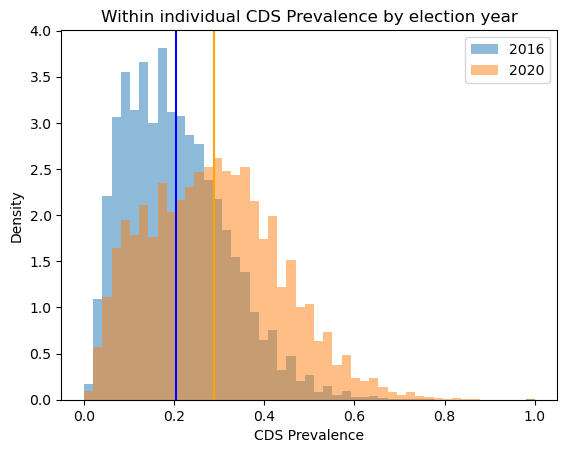

2016 mean prevalence: 0.20453591976066296
2020 mean prevalence: 0.20453591976066296
Ratio of means (2020 / 2016): 1.4061981780587345


In [32]:
bins = np.linspace(0, 1, 50)

plt.hist(user_cts['2016_prevalence'], bins, density=True, alpha=0.5, label='2016')
plt.axvline(x=user_cts['2016_prevalence'].mean(), color='blue')

plt.hist(user_cts['2020_prevalence'], bins, density=True, alpha=0.5, label='2020')
plt.axvline(x=user_cts['2020_prevalence'].mean(), color='orange')

plt.title("Within individual CDS Prevalence by election year")
plt.ylabel("Density")
plt.xlabel("CDS Prevalence")
plt.legend(loc='upper right')
plt.show()

print("2016 mean prevalence:", user_cts['2016_prevalence'].mean())
print("2020 mean prevalence:", user_cts['2016_prevalence'].mean())
print("Ratio of means (2020 / 2016):", user_cts['2020_prevalence'].mean()/user_cts['2016_prevalence'].mean())

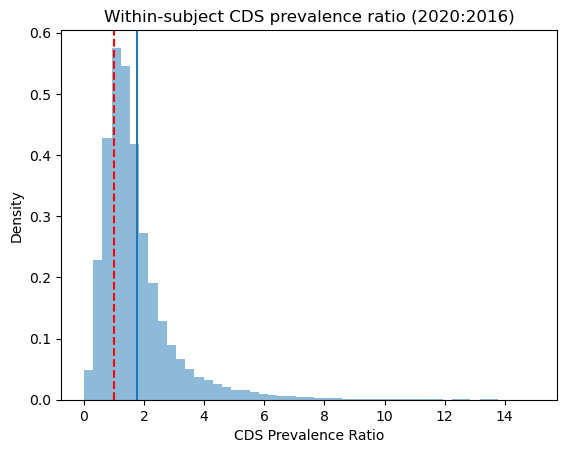

Mean prevalence ratio: 1.7602162725183617


In [33]:
bins = np.linspace(0, 15, 50)

plt.hist((user_cts['2020_prevalence']/user_cts['2016_prevalence']), bins, density=True, alpha=0.5, label='Prevalence Ration (2020/2016)')
# plt.legend(loc='upper right')
plt.axvline(x=(user_cts['2020_prevalence']/user_cts['2016_prevalence']).mean())
plt.axvline(x=1, color='r', ls='--')
plt.title("Within-subject CDS prevalence ratio (2020:2016)")
plt.ylabel("Density")
plt.xlabel("CDS Prevalence Ratio")
plt.show()

print("Mean prevalence ratio:", (user_cts['2020_prevalence']/user_cts['2016_prevalence']).mean())

In [34]:
import scipy.stats as stats 

# Performing the paired sample t-test 
ttest = stats.ttest_rel(user_cts['2020_prevalence'], user_cts['2016_prevalence'], alternative="greater") 
print(ttest)

TtestResult(statistic=187.9095772049737, pvalue=0.0, df=97747)


## Demographic data analysis - used to produce supplementary Fig S9, S10, and Table S13 

In [9]:
user_cts = pd.read_csv(data_fldr + "user_cds.csv")
ideology_2016 = pd.read_csv(data_fldr + "ideology_estimates_2016_paper.csv")
ideology_2020 = pd.read_csv(data_fldr + "ideology_estimates_2020_paper.csv")

ideology_2016 = ideology_2016.rename(columns={'account_id': 'user_id', 'est':'2016_est'})
ideology_2020 = ideology_2020.rename(columns={'account_id': 'user_id', 'est':'2020_est'})

age_gender = pd.read_csv(data_fldr + "age_gender.csv").rename(columns={'age': 'gen', 'gender':'age', 'account_id':'user_id'}).rename(columns={'gen': 'gender'}).drop_duplicates()

In [10]:
df_all = pd.merge(user_cts, ideology_2016, on='user_id')
df_all = pd.merge(df_all, ideology_2020, on='user_id')
df_all = pd.merge(df_all, age_gender, on='user_id')
# print(len(df_all))
# print(len(df_all[(df_all['2016_total']>10) & (df_all['2020_total']>10)]))

# df_all = df_all[(df_all['2016_total']>10) & (df_all['2020_total']>10)]


df_all['2016_prev'] = df_all['2016_distortion']/df_all['2016_total']
df_all['2020_prev'] = df_all['2020_distortion']/df_all['2020_total']

df_all['cds_pr'] = df_all['2020_prev']/df_all['2016_prev']

PearsonRResult(statistic=0.020525855251323933, pvalue=0.003704745968383388)


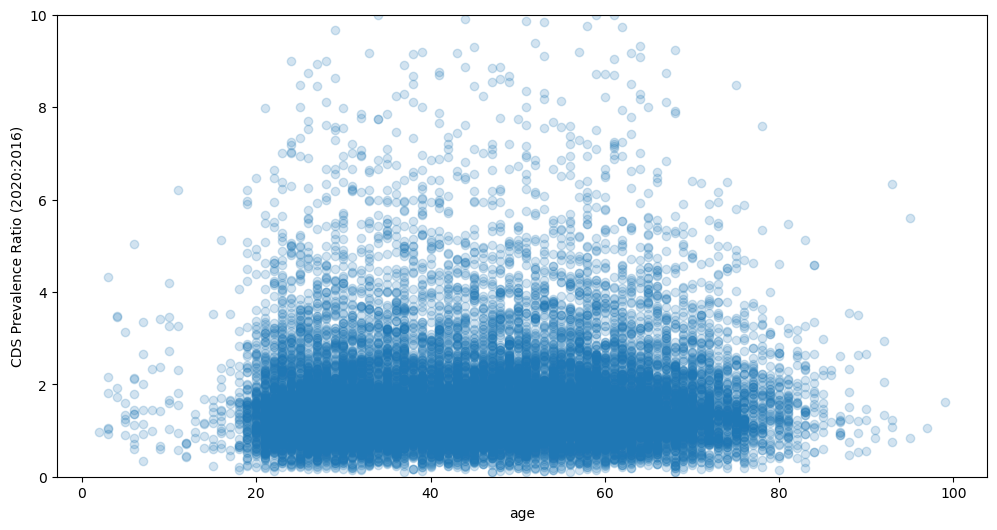

In [11]:
from scipy.stats import pearsonr

fig, ax1 = plt.subplots(figsize=(12, 6))

ax1.scatter(x=df_all['age'], y=df_all['cds_pr'], alpha = 0.2)

# ax1.set_title("Political Left")
ax1.set_xlabel("age")
ax1.set_ylabel("CDS Prevalence Ratio (2020:2016)")
ax1.set_ylim([0,10])
# ax1.set_xlim([-2,4.5])

print(stats.pearsonr(df_all['age'], df_all['cds_pr']))

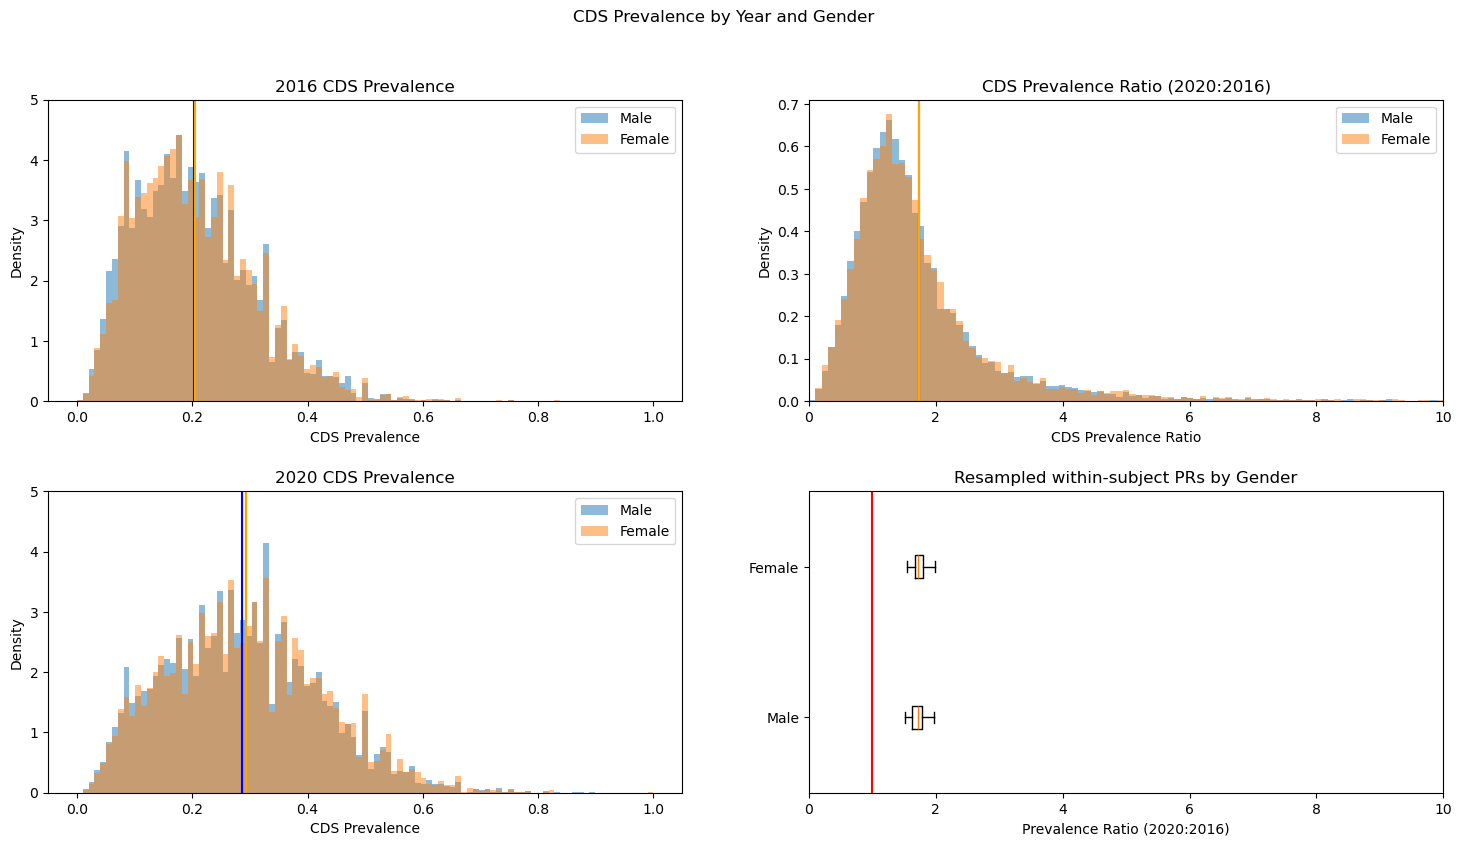

In [26]:
fig, ((ax1, ax3), (ax2, ax4)) = plt.subplots(2, 2, figsize=(18, 9))

M = df_all[df_all['gender'] == 'Male']
F = df_all[df_all['gender'] == 'Female']

bins = np.linspace(0, 1, 100)

plt.suptitle("CDS Prevalence by Year and Gender")
plt.subplots_adjust(hspace=0.3)

# 2016
ax1.hist(M['2016_prevalence'], bins, density=True, alpha=0.5, label='Male')
ax1.axvline(x=M['2016_prevalence'].mean(), color='blue')

ax1.hist(F['2016_prevalence'], bins, density=True, alpha=0.5, label='Female')
ax1.axvline(x=F['2016_prevalence'].mean(), color='orange')

ax1.set_title("2016 CDS Prevalence")
ax1.set_ylim([0,5])
ax1.set_ylabel("Density")
ax1.set_xlabel("CDS Prevalence")
ax1.legend(loc='upper right')
# ax1.show()


# 2020
ax2.hist(M['2020_prevalence'], bins, density=True, alpha=0.5, label='Male')
ax2.axvline(x=M['2020_prevalence'].mean(), color='blue')

ax2.hist(F['2020_prevalence'], bins, density=True, alpha=0.5, label='Female')
ax2.axvline(x=F['2020_prevalence'].mean(), color='orange')

ax2.set_title("2020 CDS Prevalence")
ax2.set_ylim([0,5])
ax2.set_ylabel("Density")
ax2.set_xlabel("CDS Prevalence")
ax2.legend(loc='upper right')


bins_pr = np.linspace(0, 10, 100)


# Prevalence Ratios
ax3.hist(M['cds_pr'], bins_pr, density=True, alpha=0.5, label='Male')
ax3.axvline(x=M['cds_pr'].mean(), color='blue')

ax3.hist(F['cds_pr'], bins_pr, density=True, alpha=0.5, label='Female')
ax3.axvline(x=F['cds_pr'].mean(), color='orange')

ax3.set_title("CDS Prevalence Ratio (2020:2016)")
ax3.set_ylabel("Density")
ax3.set_xlabel("CDS Prevalence Ratio")
ax3.legend(loc='upper right')
ax3.set_xlim([0,10])



# Boxplot
ax4.boxplot(gender, vert=False, showfliers=False, whis=(2.5,97.5))

ax4.set_yticklabels(gender.columns)
ax4.set_xlim([0,10])

ax4.set_xlabel("Prevalence Ratio (2020:2016)")
ax4.set_title("Resampled within-subject PRs by Gender")
ax4.axvline(1, color='r')

plt.show()

# ax2.plot(x, -y)

### Demographic breakdown:

In [22]:
# age calculated in 2020, convert to generation:
# Baby Boom Generation: Born 1946–1964.
# Generation X: Born 1965–1980.
# Millennial Generation or Generation Y: Born 1981–1996.
# Generation Z or iGen: Born 1997–2012.
# Generation Alpha: Born 2013-2024.
# https://www.pewresearch.org/short-reads/2019/01/17/where-millennials-end-and-generation-z-begins/


print("Demographic Breakdown: ")

total_n = len(user_cts)
total_est = len(age_gender)

print(f"Total users: {total_n}")
print(f"Total with est demographic: {total_est}")
print(f"% with est demographic: {round(total_est/total_n, 4)}", '\n')


def get_generation(age):
    birth_year = 2020 - age
    if birth_year < 1946:
        return "pre-1946"
    elif birth_year < 1965:
        return "Baby Boomer"
    elif birth_year < 1981:
        return "Gen X"
    elif birth_year < 1996:
        return "Millenial"
    elif birth_year < 2013:
        return "Gen Z"
    else:
        return "Gen Alpha"


def age_group(age, age_interval=5, lower_lim=15, upper_lim=65):
    left = (int((age - lower_lim)/age_interval)*age_interval) + lower_lim
    right = (int((age - lower_lim)/age_interval + 1)*age_interval) - 1 + lower_lim
    if left > upper_lim:
        return ">" + str(upper_lim)
    elif right < lower_lim:
        return "<" + str(lower_lim)
    else: 
        return str(left) + "-" + str(right)



gen_ordering = ['pre-1946', 'Baby Boomer', 'Gen X', 'Millenial', 'Gen Z', 'Gen Alpha']

print(f"Age (years), mean (std): {round(df_all['age'].mean(), 2)} ({round(df_all['age'].std(), 2)})", '\n')

# generation counts
df_all['generation'] = df_all['age'].apply(get_generation)
print(df_all.groupby('generation').count()['user_id'][gen_ordering], '\n')

print((df_all.groupby('generation').count()['user_id']/total_est).apply(lambda x: round(x, 4)*100)[gen_ordering], '\n')

# gender counts
print(df_all.groupby('gender').count()['user_id'], '\n')

print((df_all.groupby('gender').count()['user_id']/total_est).apply(lambda x: round(x, 4)*100), '\n')

# # age group counts
# df_all['age_group'] = df_all['age'].apply(age_group)
# print(df_all.groupby('age_group').count()['user_id'], '\n')

# print((df_all.groupby('age_group').count()['user_id']/total_est).apply(lambda x: round(x, 4)*100), '\n')

# age group counts (min 18)
df_all['age_group'] = df_all['age'].apply(age_group, args=(7,18,24))
print(df_all.groupby('age_group').count()['user_id'], '\n')

print((df_all.groupby('age_group').count()['user_id']/total_est).apply(lambda x: round(x, 4)*100), '\n')

# df_all['age_group'] = df_all['age'].apply(age_group, args=(10,25,65))
# print(df_all.groupby('age_group').count()['user_id'], '\n')

# print((df_all.groupby('age_group').count()['user_id']/total_est).apply(lambda x: round(x, 4)*100), '\n')

        


Demographic Breakdown: 
Total users: 97748
Total with est demographic: 19991
% with est demographic: 0.2045 

Age (years), mean (std): 46.03 (15.65) 

generation
pre-1946        614
Baby Boomer    5418
Gen X          6368
Millenial      5974
Gen Z          1582
Gen Alpha        35
Name: user_id, dtype: int64 

generation
pre-1946        3.07
Baby Boomer    27.10
Gen X          31.85
Millenial      29.88
Gen Z           7.91
Gen Alpha       0.18
Name: user_id, dtype: float64 

gender
Female     7882
Male      12109
Name: user_id, dtype: int64 

gender
Female    39.43
Male      60.57
Name: user_id, dtype: float64 

age_group
18-24     1511
<18        106
>24      18374
Name: user_id, dtype: int64 

age_group
18-24     7.56
<18       0.53
>24      91.91
Name: user_id, dtype: float64 



In [23]:
# Printing out demographic counts with latex table formatting

print((df_all.groupby('age_group').count()['user_id']/total_est).apply(lambda x: round(x, 4)*100), '\n')

cols = ['age_group', 'gender', 'generation']

for col in cols:
    print('\n', col)
    for label in sorted(list(set(df_all[col]))):
        n = len(df_all[df_all[col]==label])
        percent = (len(df_all[df_all[col]==label]) / len(df_all))*100
        print("\\hspace{3mm}", f"{label} & {n} ({round(percent, 2)}\%) \\\\")

age_group
18-24     7.56
<18       0.53
>24      91.91
Name: user_id, dtype: float64 


 age_group
\hspace{3mm} 18-24 & 1511 (7.56\%) \\
\hspace{3mm} <18 & 106 (0.53\%) \\
\hspace{3mm} >24 & 18374 (91.91\%) \\

 gender
\hspace{3mm} Female & 7882 (39.43\%) \\
\hspace{3mm} Male & 12109 (60.57\%) \\

 generation
\hspace{3mm} Baby Boomer & 5418 (27.1\%) \\
\hspace{3mm} Gen Alpha & 35 (0.18\%) \\
\hspace{3mm} Gen X & 6368 (31.85\%) \\
\hspace{3mm} Gen Z & 1582 (7.91\%) \\
\hspace{3mm} Millenial & 5974 (29.88\%) \\
\hspace{3mm} pre-1946 & 614 (3.07\%) \\


### Resampling:

In [24]:
from tqdm import tqdm

def resample(df, data_col = 'cds_pr', category_col="generation", n=10000, s=100):
    categories = list(set(df[category_col]))
    results = {cat:[] for cat in categories}

    for i in tqdm(range(n)):
        for cat in categories:
            if s == -1:
                rs_size = len(df[df[category_col] == cat])
            else:
                rs_size = s
            rs = df[df[category_col] == cat].sample(n=rs_size, replace=True)
            results[cat].append(rs[data_col].mean())

    return pd.DataFrame(results)

generation_cds = resample(df_all)

meds = generation_cds.median()
meds.sort_values(ascending=True, inplace=True)
generation_cds = generation_cds[meds.index]

gen_ordering = ['Baby Boomer', 'Gen X', 'Millenial', 'Gen Z']
gen_labels = ['Baby Boomers (1946–1964)',
'Gen X (1965–1980)',
'Millennials (1981–1996)',
'Gen Z (1997–2012)']


gender_cds = resample(df_all, data_col = 'cds_pr', category_col="gender",)

meds = gender_cds.median()
meds.sort_values(ascending=True, inplace=True)
gender = gender_cds[meds.index]

100%|█████████████████████████████████████████████████████████████████████████████████████████████| 100/100 [00:00<00:00, 158.97it/s]


Baby Boomer : n = 5418
Gen X : n = 6368
Millenial : n = 5974
Gen Z : n = 1582


IndexError: single positional indexer is out-of-bounds

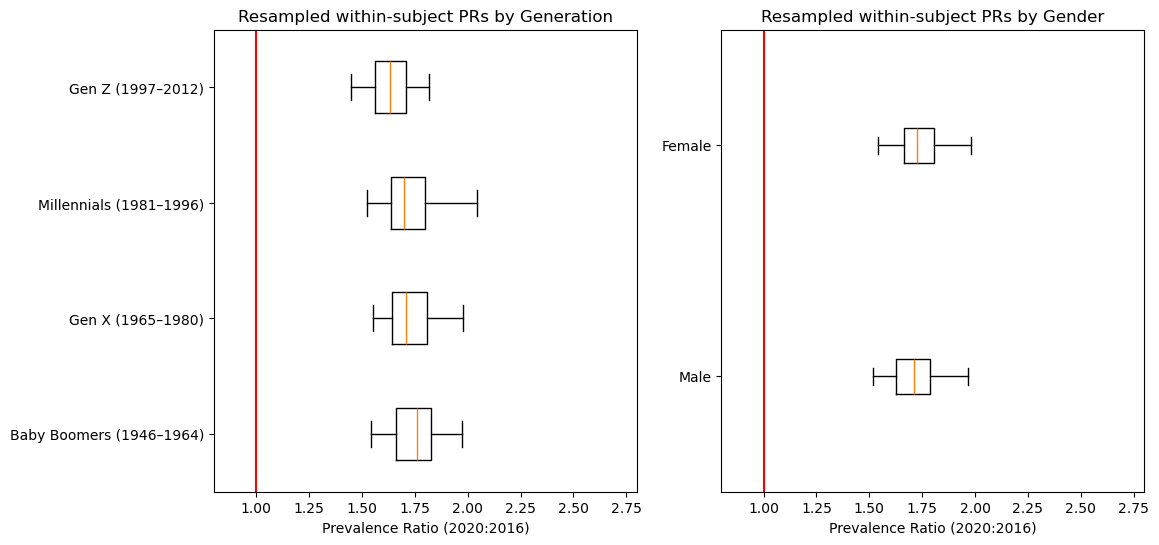

In [27]:
import matplotlib.pyplot as plt

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 6))

ax1.boxplot(generation_cds[gen_ordering], vert=False, showfliers=False, whis=(2.5,97.5))

ax1.set_yticklabels(gen_labels)
ax1.set_xlim([0.8,2.8])

ax1.set_xlabel("Prevalence Ratio (2020:2016)")
ax1.set_title("Resampled within-subject PRs by Generation")
ax1.axvline(1, color='r')

ax2.boxplot(gender, vert=False, showfliers=False, whis=(2.5,97.5))

ax2.set_yticklabels(gender.columns)
ax2.set_xlim([0.8,2.8])

ax2.set_xlabel("Prevalence Ratio (2020:2016)")
ax2.set_title("Resampled within-subject PRs by Gender")
plt.axvline(1, color='r')

for gen in gen_ordering:
    print(gen, ": n =", len(df_all[df_all['generation'] == gen]))

print(f"Female: 97.5 percentile = {round(gender['Female'].sort_values().iloc[9750], 2)}, median = {round(gender['Female'].median(), 2)}, n = {len(df_all[df_all['gender'] == 'Female'])}")
print(f"Male: 2.5 percentile = {round(gender['Male'].sort_values().iloc[9750], 2)}, median = {round(gender['Male'].median(), 2)}, n = {len(df_all[df_all['gender'] == 'Male'])}")

In [28]:
age_cds = resample(df_all, data_col = 'cds_pr', category_col="age_group",)


100%|█████████████████████████████████████████████████████████████████████████████████████████████| 100/100 [00:00<00:00, 112.78it/s]


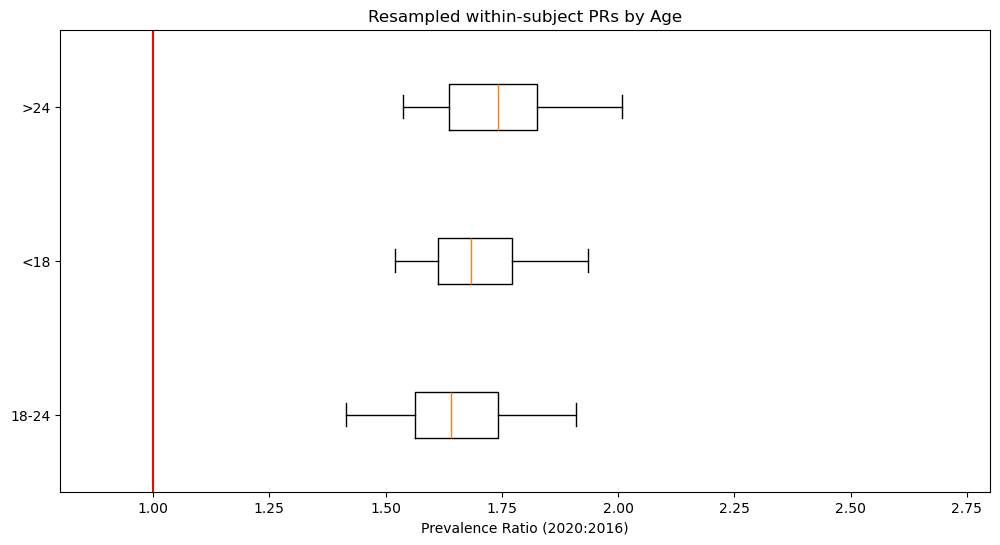

In [29]:
import matplotlib.pyplot as plt

fig, (ax1) = plt.subplots(1, 1, figsize=(12, 6))

age_groups = list(age_cds.columns)
age_groups.sort()

ax1.boxplot(age_cds[age_groups], vert=False, showfliers=False, whis=(2.5,97.5))

ax1.set_yticklabels(age_groups)
ax1.set_xlim([0.8,2.8])

ax1.set_xlabel("Prevalence Ratio (2020:2016)")
ax1.set_title("Resampled within-subject PRs by Age")
ax1.axvline(1, color='r')

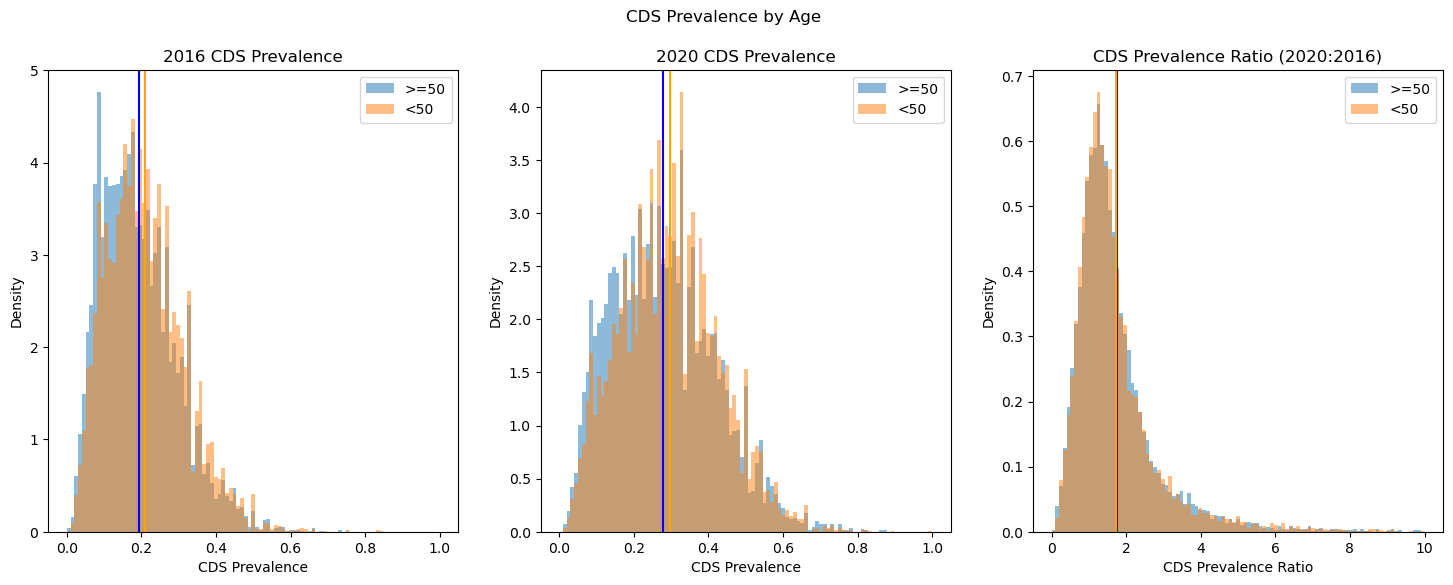

In [30]:
fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(18, 6))

M = df_all[df_all['age'] >= 50]
F = df_all[df_all['age'] < 50]

l1 = '>=50'
l2 = '<50'


bins = np.linspace(0, 1, 100)

plt.suptitle("CDS Prevalence by Age")

# 2016
ax1.hist(M['2016_prevalence'], bins, density=True, alpha=0.5, label=l1)
ax1.axvline(x=M['2016_prevalence'].mean(), color='blue')

ax1.hist(F['2016_prevalence'], bins, density=True, alpha=0.5, label=l2)
ax1.axvline(x=F['2016_prevalence'].mean(), color='orange')

ax1.set_title("2016 CDS Prevalence")
ax1.set_ylabel("Density")
ax1.set_xlabel("CDS Prevalence")
ax1.legend(loc='upper right')
# ax1.show()


# 2020
ax2.hist(M['2020_prevalence'], bins, density=True, alpha=0.5, label=l1)
ax2.axvline(x=M['2020_prevalence'].mean(), color='blue')

ax2.hist(F['2020_prevalence'], bins, density=True, alpha=0.5, label=l2)
ax2.axvline(x=F['2020_prevalence'].mean(), color='orange')

ax2.set_title("2020 CDS Prevalence")
ax2.set_ylabel("Density")
ax2.set_xlabel("CDS Prevalence")
ax2.legend(loc='upper right')


bins_pr = np.linspace(0, 10, 100)


# Prevalence Ratios
ax3.hist(M['cds_pr'], bins_pr, density=True, alpha=0.5, label=l1)
ax3.axvline(x=M['cds_pr'].mean(), color='blue')

ax3.hist(F['cds_pr'], bins_pr, density=True, alpha=0.5, label=l2)
ax3.axvline(x=F['cds_pr'].mean(), color='orange')

ax3.set_title("CDS Prevalence Ratio (2020:2016)")
ax3.set_ylabel("Density")
ax3.set_xlabel("CDS Prevalence Ratio")
ax3.legend(loc='upper right')



# ax2.plot(x, -y)